# [Sign language dactyl recognition based on machine learning algorithms](https://www.researchgate.net/publication/354349413_Sign_language_dactyl_recognition_based_on_machine_learning_algorithms)

In [ ]:
import numpy as np 
import pandas as pd 
import glob
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import keras
from sklearn.preprocessing import LabelEncoder


In [3]:
RANDOM_STATE = 1228
keras.utils.set_random_seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

TEST_DATA_PATH = '/Users/kamilla/Desktop/masters_diploma/SOTA_MODELS/SOTA_3/data_SOTA_3/green_images/green_test_01_06_mp_2'
TRAIN_DATA_PATH = '/Users/kamilla/Desktop/masters_diploma/SOTA_MODELS/SOTA_3/data_SOTA_3/green_images/green_train_01_06_mp_2'
#VAL_DATA_PATH = '/Users/kamilla/Desktop/masters_diploma/SOTA_MODELS/SOTA_3/data_SOTA_3/temp_val'

# Создадим датафрейм, где будем сохранять путь до картинки и ее лейбл

dactyl = ["А", "Б", "В", "Г", "Е",
          "Ж", "И", "К", "Л", "М",
          "Н", "О", "П", "Р", "С",
          "Т", "У", "Ф", "Х", "Ч",
          "Ш", "Ы", "Э", "Ю", "Я"]

def get_metadata(data_path):
    list_path = []
    list_labels = []
    for label in dactyl:
        label_path = os.path.join(data_path, label, "*")
        image_files = glob.glob(label_path)

        sign_label = [label] * len(image_files)

        list_path.extend(image_files)
        list_labels.extend(sign_label)

    metadata = pd.DataFrame({
        "image_path": list_path,
        "label": list_labels
    })
    return metadata

train_df = get_metadata(TRAIN_DATA_PATH)
print(f"DataFrame for train is ready. Processed {len(train_df)}")
test_df = get_metadata(TEST_DATA_PATH)
print(f"DataFrame for test is ready. Processed {len(test_df)}")
#val_df = get_metadata(VAL_DATA_PATH)
#print(f"DataFrame for val is ready. Processed {len(val_df)}")

DataFrame for train is ready. Processed 2339
DataFrame for test is ready. Processed 259


In [4]:
y_train, x_train = train_df['label'], train_df['image_path']
y_test, x_test = test_df['label'], test_df['image_path']
#y_val, x_val = val_df['label'], val_df['image_path']

x_train.reset_index(inplace=True, drop=True)
#x_val.reset_index(inplace=True, drop=True)
x_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
#y_val.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [5]:
def get_images(data):
    new_data = []
    for image in range(len(data)):
        if data[image].endswith(".jpg") or data[image].endswith(".jpeg") or data[image].endswith(".JPG"):
            numpy_image = cv2.imread(data[image], cv2.COLOR_RGB2BGR)
            #image_resized = cv2.resize(numpy_image, (64, 64))
            new_data.append(numpy_image)
    return new_data


x_train_images = get_images(x_train)
x_test_images = get_images(x_test)

In [6]:
le = LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)
y_train_cat = keras.utils.to_categorical(y_train_encoded)

y_test_encoded = le.transform(y_test)
y_test_cat = keras.utils.to_categorical(y_test_encoded)

#y_val_encoded = le.transform(y_val_prep)
#y_val_cat = keras.utils.to_categorical(y_val_encoded)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout, Input
from keras.callbacks import ModelCheckpoint


In [8]:
model_1 = Sequential()
model_1.add(Conv2D(15, 4, activation='relu', input_shape=(128,128,3)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(30, 1,  activation='relu', padding="same", use_bias=True))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dropout(0.5))
model_1.add(Dense(25, activation='softmax'))  # Adjust the number of units based on the problem (e.g., number of output classes)


model_1.summary()

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 125, 125, 15)   │           735 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 30)     │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28830)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28830)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │       720,775 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721,990 (2.75 MB)

 Trainable params: 721,990 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)

# Создаем объект ModelCheckpoint для сохранения лучших весов модели
checkpoint = ModelCheckpoint(filepath='/Users/kamilla/Desktop/masters_diploma/SOTA_MODELS/SOTA_1/checkpointHSV.model.keras', 
                             monitor='val_accuracy', 
                             save_best_only=True,
                            mode='max',
                            verbose=1)

model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_train_prep = np.array(x_train_images)
#x_val_prep = np.array(x_val_prep)
x_test_prep = np.array(x_test_images)

In [12]:
history = model_1.fit(
    x=x_train_prep,
    y=y_train_cat, 
    batch_size=64,
    epochs=200,
    verbose=1,
    validation_data=(x_test_prep, y_test_cat),
    validation_batch_size=32,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.1830 - loss: 25.5708
Epoch 1: val_accuracy improved from -inf to 0.66795, saving model to /Users/kamilla/Desktop/masters_diploma/SOTA_MODELS/SOTA_1/checkpointHSV.model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.1865 - loss: 25.3846 - val_accuracy: 0.6680 - val_loss: 5.6002
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.6384 - loss: 6.7849
Epoch 2: val_accuracy improved from 0.66795 to 0.74131, saving model to /Users/kamilla/Desktop/masters_diploma/SOTA_MODELS/SOTA_1/checkpointHSV.model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - accuracy: 0.6386 - loss: 6.7813 - val_accuracy: 0.7413 - val_loss: 3.6480
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.7366 - loss: 4.3793
Epoch 3: val_accuracy improved from 0.74131 to 0.77992, saving model to /Users/kamilla/Desktop/masters_diploma/SOTA_MODELS/SOTA_1/checkpointHSV.model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 211ms/st

Epoch 24/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9791 - loss: 0.1195
Epoch 24: val_accuracy did not improve from 0.86100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.9791 - loss: 0.1199 - val_accuracy: 0.8417 - val_loss: 1.9897
Epoch 25/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9811 - loss: 0.0934
Epoch 25: val_accuracy did not improve from 0.86100
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.9811 - loss: 0.0937 - val_accuracy: 0.8494 - val_loss: 1.9095
Epoch 26/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9841 - loss: 0.1048
Epoch 26: val_accuracy did not improve from 0.86100
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.9842 - loss: 0.1046 - val_accuracy: 0.8456 - val_loss: 1.8169
Epoch 27/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9865 - loss: 0.0724
Epoch 27: val_accuracy did not improve from 0.86100
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step - accuracy: 0.9865 - loss: 0.0728 - val_accuracy

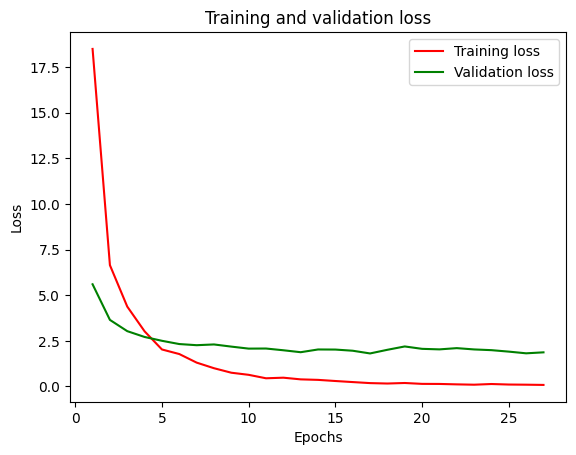

In [13]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 27+1)
#print(len(epochs))
plt.plot(epochs, loss_values, '-', label='Training loss', color='r')
plt.plot(epochs, val_loss_values, '-', label='Validation loss', color='g') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
y_pred = model_1.predict(x_test_prep)
#y_pred_val = model.predict(x_val_prep)

y_preds_class_1 = np.argmax(y_pred, axis=1).tolist()
#y_preds_class_val = np.argmax(y_pred_val, axis=1).tolist()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [15]:
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(y_test_encoded, y_preds_class_1)
print(f"Точность на тесте (без аугументации): {accuracy_test}")

Точность на тесте (без аугументации): 0.8494208494208494


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_encoded, y_preds_class_1, average='weighted')
recall = recall_score(y_test_encoded, y_preds_class_1, average='weighted')
f1 = f1_score(y_test_encoded, y_preds_class_1, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.860304624590339
Recall: 0.8494208494208494
F1-score: 0.8475451407974532
